# Logistic Regression 

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [2]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [7]:
def linear_regression(theta, x, y):
    value = theta[0] + theta[1] * x + theta[2]*y

    return value

## define sigmoid function with input $x$

In [8]:
def sigmoid(theta, x, y):
    val = linear_regression(theta,x,y)
    z = 1/(1 + np.exp(-val))
    return z

## define loss function for the logistic regression

In [9]:
def compute_loss(theta, x, y, label):
    z = sigmoid(theta,x,y)
    loss = (-label * np.log(z)) - (1-label)*np.log(1-z)
    loss = sum(loss)/num_data
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [10]:
def compute_gradient(theta, x, y, label):
    z = sigmoid(theta,x,y)

    a = np.ones((num_data, 3))
    for i in range(num_data):
        a[i][1] = x[i]
        a[i][2] = y[i]
    grad=(1/num_data) * np.matmul(a.T, (z-label))
    return grad

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [11]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

## iterations for the gradient descent

In [12]:
for i in range(num_iteration):
    theta  = theta - learning_rate * compute_gradient(theta,point_x,point_y,label)
    loss    = compute_loss(theta,point_x,point_y,label)
    theta_iteration[i] = theta
    loss_iteration[i]   = loss


In [13]:
theta0_iteration = np.zeros(num_iteration)
theta1_iteration = np.zeros(num_iteration)
theta2_iteration = np.zeros(num_iteration)
for i in range(num_iteration):
    theta0_iteration[i] = theta_iteration[i][0]
    theta1_iteration[i] = theta_iteration[i][1]
    theta2_iteration[i] = theta_iteration[i][2]

In [14]:
f = theta[0] + theta[1] * point_x + theta[2] * point_y

## plot the results

In [15]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    plt.plot(loss_iteration, '-', color='red')


    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [16]:
def plot_data(point_x, point_y):
    x_0 = np.zeros(300)
    y_0 = np.zeros(300)
    for i in range(300):
        x_0[i] = point_x[i]
        y_0[i] = point_y[i]
    x_1 = np.zeros(300)
    y_1 = np.zeros(300)
    for i in range(300):
        x_1[i] = point_x[i+300]
        y_1[i] = point_y[i+300]
    
    plt.figure(figsize=(8,8))
    plt.title('training data')
    
    plt.plot(x_0, y_0,'.', color='blue', label = 'class = 0')
    plt.plot(x_1, y_1,'.', color='red', label = 'class = 1')
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [17]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    plt.plot(theta0_iteration, '-', color='red', label = 'theta0')
    plt.plot(theta1_iteration, '-', color='green', label = 'theta1')
    plt.plot(theta2_iteration, '-', color='blue', label = 'theta2')

    plt.xlabel('iteration')
    plt.legend(loc="center right")
    plt.tight_layout()
    plt.show()

In [18]:
X0  = np.arange(-30, 30, 0.1)
X1  = np.arange(-30, 30, 0.1)
XX,YY = np.meshgrid(X0, X1)

def func(x,y):
    return theta[0] + theta[1] * x + theta[2] * y
ZZ = np.array(func(XX,YY))

z = func(X0, X1)


def plot_classifier(XX,YY,ZZ,point_x,point_y, z):
    x_0 = np.zeros(300)
    y_0 = np.zeros(300)
    for i in range(300):
        x_0[i] = point_x[i]
        y_0[i] = point_y[i]
    x_1 = np.zeros(300)
    y_1 = np.zeros(300)
    for i in range(300):
        x_1[i] = point_x[i+300]
        y_1[i] = point_y[i+300]
    
    plt.axis('equal')
    plt.contourf(XX, YY, ZZ, levels = np.linspace(ZZ.min(), ZZ.max()),cmap="RdBu_r")
    plt.colorbar()
    plt.contour(XX,YY,ZZ,levels=0, linewidths=1,colors='k')

    plt.plot(x_0, y_0,'.', color='blue', label = 'class = 0')
    plt.plot(x_1, y_1,'.', color='red', label = 'class = 1')
    plt.legend()

    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

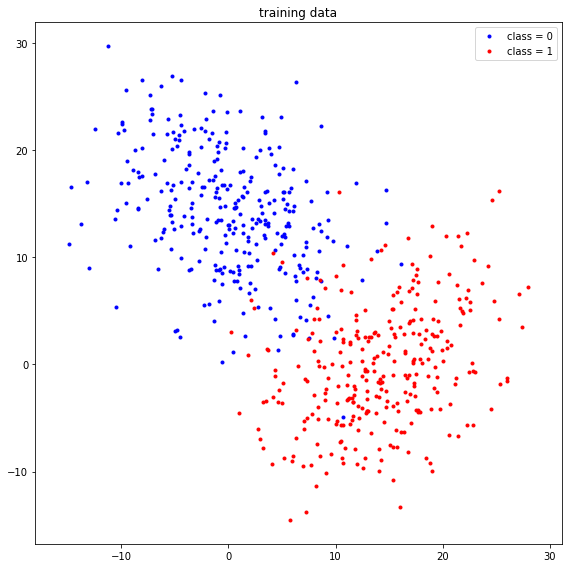

In [19]:
plot_data(point_x, point_y)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

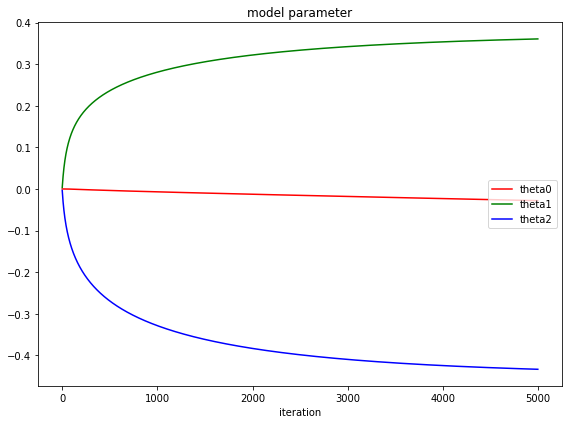

In [20]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

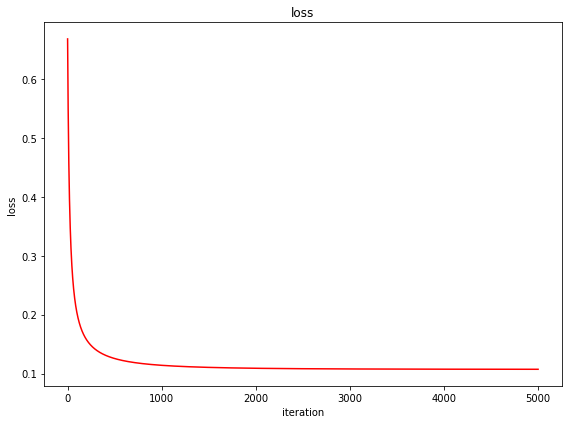

In [21]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

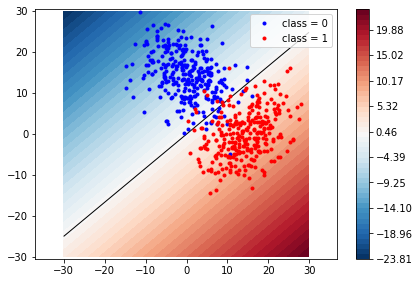

In [26]:
plot_classifier(XX,YY,ZZ,point_x,point_y, z)